# MGT6203 HW3 Part 2 (60 Points Total)

## Instructions:


**For Homework 3 Part 2, please use this R notebook in Vocareum to submit your solutions. Vocareum is an educational cloud platform for programming in several languages; it is based on the Jupyter notebook environment. This platform allows us to move homework assignments to the cloud. The advantages are that all of you will be working in the same coding environment AND peer reviewers will be able to run your R code easily. This way we eliminate some issues we might encounter when working on an individual/local basis, such as library installations and Rstudio OS requirements; R notebooks work on mobile platforms and tablets.**

**With R notebooks, you will be learning a new way of presenting data analysis reports, that is neat and flexible, where formatted (English) text and (R) code can easily coexist on the same page. Notebooks can be also collaborative when needed. For now, we are asking each of you to do your own work for homework. Think of R notebooks as interactive program-based Google docs or MS-Office 360 docs; these are gradually replacing local files on our computers. **

**Many of you are new to the R notebooks and Vocareum platforms. We will provide TA help in Piazza with specific code if you have questions. Here we list some important things to get you started. Please read through them carefully.**


<ol>
<li>Even though we are moving from your local envrionment to the cloud, **our expectations from your homework will remain the same**. Same goes for the rubrics.</li>

<li>Vocareum has its own cloud based file system, the data files you will be using for the assignments will be stored in the cloud with path **"../resource/asnlib/publicdata/FILENAME.csv"**. You will be able to import them with the same method as you do in RStudio, simply substitute the path name to the one specified in the instructions. You won't be able to modify these data files.</li>

<li>You will be able to find the data files on Canvas/EdX if you would like to explore them offline.</li>

<li>**For coding questions, you will be graded on the R code as well as the output** in your submission.</li>

<li>**For interpretations or short response questions, please type the answers in the notebook's markdown cells**. To change a code cell to a markdown cell, click on the cell, and in the dropdown menu above, switch the type of the cell block from "code" to "markdown". **Adding print statements to code cells for short response/interpretation questions is also fine, as long as we can clearly see the output of your response**.</li>

<li>You don't need to, but if you would like to learn more about how to format your markdown cells, visit the following site: https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/. Jupyter notebook also support LaTeX.</li>

<li>**Feel free to delete or add as many additional cells as you need**. But please try to keep your notebook clean and keep your solution to a question directly under that question to avoid confusions.</li>

<li>You may delete the #SOLUTION BEGINS/ENDS HERE comments from the cell blocks, they are just pointers that indicates where to put you solutions.</li>

<li>**When you have finished the assignment, remember to rerun your notebook to check if it runs correctly.** You can do so by going to **Kernel-> Restart & Run All**. You may lose points if your solutions does not run successfully.</li>

<li>**Click the "Submit" button on the top right corner to turn in your assignment**. Your assignment will enter the next phase for peer review.</li>

<li>**You are allowed a total of 2 submissions for this assignment.** So make sure that you submit your responses carefully. You will be able to come back and resubmit your assignment as long as it is before the start of the peer review period.</li>

<li>**Please remember to finish the peer reviews after you have submitted your assignment.** You are responsible for grading the work of three of your peers thoroughly, and in addherence to the rubrics. And you will be held accountable for peer grading. **There will be a 30% penalty to your grade if you fail to complete one or more peer reviews in proper fashion.**</li>

<li>Feel free to address your questions, concerns, and provide any feedback on Piazza. We will continuously try to improve going forward.</li>

<li>Good Luck!</li>

</ol>



# About Package Installation:

Most of the packages (if not all) that you will need to complete this assignment are already installed in this environment. An easy way to check this is to run the command: library(PackageName). If this command runs successfully then the package was already installed and has been successfully attached to the code. If the command gave an error saying the Package was not found then follow the steps below to successfully install the package and attach it to the code: 

Use *installed.packages()* command to return a table of the packages that are preinstalled in the environment.

To attach a preinstalled library in Vocareum, simply use *library(PackageName)*

**To install a package that does not come with the provided environment, please use the following syntax:**

*install.packages("PackageName", lib="../work/")*

**To attach a library you just installed, use the following syntax:**

*library(PackageName, lib.loc="../work/")*

Make sure the file location is the same as the above code snippets *("../work/")*




## Instructions for Q1 to Q2:

Please use the Facebook Ad dataset 'KAG.csv'  for the next set of questions. We advise solving these questions using R (preferably using dplyr library wherever applicable) after reviewing the code provided for Week 11 and other resources provided for learning dplyr in R Learning Guide.

Load the dataset as below:

data <- read.csv("../resource/asnlib/publicdata/KAG.csv", stringsAsFactors = FALSE)

**IMPORTANT NOTE: For no clicks and no amount spent, please consider CPC as 0.**

### Q1. (8 Points)

#### a. Among the ads that have the least CPC, which one ad leads to the most impressions? (provide  ad_id as the answer) (4 Points)

In [1]:
# SOLUTION BEGINS HERE
suppressMessages(library(dplyr))
data <- read.csv("../resource/asnlib/publicdata/KAG.csv", stringsAsFactors = FALSE)
temp <- data %>% 
filter(CPC == min(data$CPC)) %>%
arrange(desc(Impressions)) %>%
top_n(n=1, wt=Impressions)%>%
select (ad_id, Impressions, CPC)

# Ad that have the least CPC and most impressions
print(temp)
# SOLUTION ENDS HERE

    ad_id Impressions CPC
1 1121094       24362   0


#### b. What campaign (provide campaign_id as the answer) had spent least efficiently on brand awareness on average?  (4 Points)

$i.e.\: to\: calculate\: most\: Cost\: Per\: Mille\: or\: CPM, use: \frac{total\: cost\: for\: the\: campaign}{total\: impressions\: in\: thousands}$

In [2]:
# SOLUTION BEGINS HERE

temp <- data %>%
mutate(CPM_Ad=round(Spent/(Impressions/1000),2))%>%
group_by(campaign_id) %>%
summarise(CPM_campaign = mean(CPM_Ad))%>%
arrange(CPM_campaign)

head(temp)

# SOLUTION ENDS HERE

`summarise()` ungrouping output (override with `.groups` argument)



campaign_id,CPM_campaign
<int>,<dbl>
936,0.2240948
916,0.2405556
1178,0.2503360


Campaign 936 spent the least efficiently on average with an average CPM of 0.2240948

### Q2. (8 Points)

Assume each conversion ('Total_Conversion') is worth 10 dollars, each approved conversion (‘Approved_Conversion’) is worth 50 dollars. ROAS (return on advertising spent) is revenue divided by advertising spent. Calculate ROAS and round it to two decimals. (Use 'Spent' as the Cost in the given ROAS formula)

In [3]:
# SOLUTION BEGINS HERE

temp <- data %>%
mutate(ROA=round(((10*Total_Conversion+50*Approved_Conversion)/Spent)*100,2))

head(temp)

# SOLUTION ENDS HERE

,X,ad_id,campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,CTR,CPC,CostPerConv_Total,CostPerConv_Approved,ROA
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,708746,916,32,0,15,7350,1,1.43,2,1,0.0136,1.43,0.715,1.43,4895.11
2,2,708749,916,32,0,16,17861,2,1.82,2,0,0.0112,0.91,0.910,1.82,1098.90
3,3,708771,916,32,0,20,693,0,0.00,1,0,0.0000,0.00,0.000,0.00,Inf
4,4,708815,916,32,0,28,4259,1,1.25,1,0,0.0235,1.25,1.250,1.25,800.00
5,5,708818,916,32,0,28,4133,1,1.29,1,1,0.0242,1.29,1.290,1.29,4651.16
6,6,708820,916,32,0,29,1915,0,0.00,1,1,0.0000,0.00,0.000,0.00,Inf


$$Hint: ROAS = \frac{Revenue}{Spent}=\frac{10\times Total Conversion+50\times Approved Conversion}{Spent} \times 100\%$$

#### a. Make a boxplot of the ROAS grouped by gender for interest_id = 15, 21, 101 in one graph. Try to use the function '+ scale_y_log10()' in ggplot to make the visualization look better. The x-axis label should be 'Interest ID' while the y-axis label should be ROAS; and each interest_id will have two boxplots (one boxplot for each gender). (4 Points) 
Hint:  Remember to filter the advertisements where there is no advertising spent.  
Hint:  ROAS should be rounded to the second decimal.  

Warning message:
“Removed 23 rows containing non-finite values (stat_boxplot).”


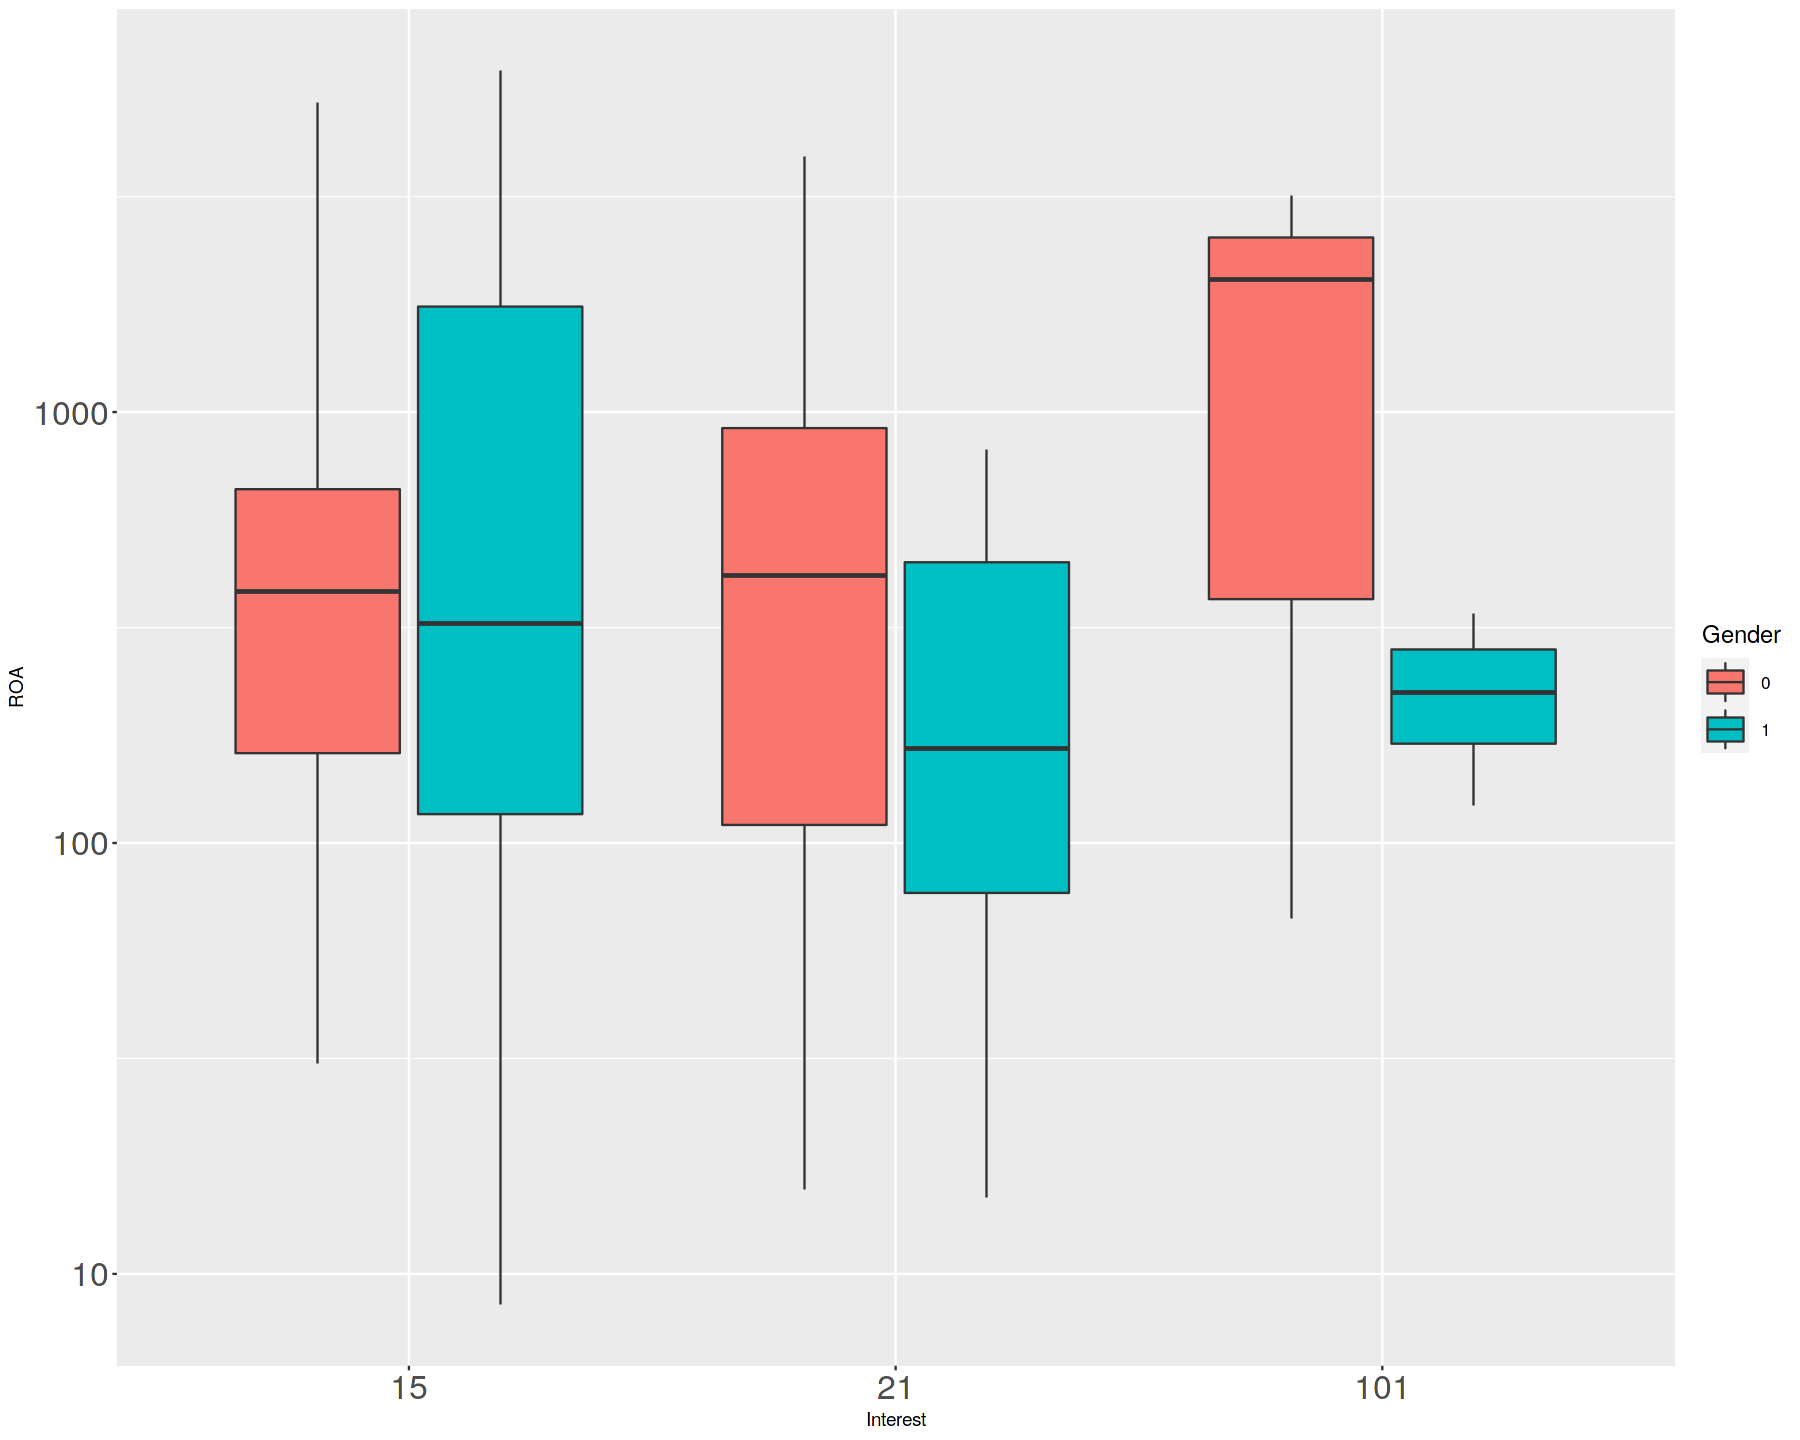

In [4]:
# SOLUTION BEGINS HERE
library(ggplot2)

data2 <- temp %>% filter(interest %in% c('15','21','101'))

options(repr.plot.width=15, repr.plot.height=12)
ggplot(data = data2, aes(x=as.factor(interest), y=ROA)) +geom_boxplot(aes(fill=as.factor(gender))) + 
scale_y_log10()+ xlab("Interest") + 
ylab("ROA")+guides(fill=guide_legend(title="Gender"))+
theme(legend.key.size = unit(1, 'cm'), #change legend key size
        legend.key.height = unit(1, 'cm'), #change legend key height
        legend.key.width = unit(1, 'cm'), #change legend key width
        legend.title = element_text(size=14), #change legend title font size
        legend.text = element_text(size=10),
        axis.text.x = element_text(size=20),
        axis.text.y = element_text(size=20)
     )  #c

# SOLUTION ENDS HERE

#### b. Summarize the median and mean of ROAS by genders when campign_id == 1178. (4 Points)

Hint:  Remember to filter the advertisements where there is no advertising spent. <br>
Hint:  Your answer should include all interest_ids  
Hint:  ROAS should be rounded to the second decimal. 

In [5]:
# SOLUTION BEGINS HERE
temp %>%
filter(campaign_id == 1178 & Spent>0.0) %>%
group_by(gender) %>%
summarise(Mean_ROA = mean(ROA), Median_ROA = median(ROA))

# SOLUTION ENDS HERE

`summarise()` ungrouping output (override with `.groups` argument)



gender,Mean_ROA,Median_ROA
<int>,<dbl>,<dbl>
0,314.1984,159.110
1,192.3026,92.155


## Instructions for Q3 to Q5:

Using the Advertising.csv dataset and the following setup instructions to solve the questions.  

In [6]:
library(pROC) 
library(caret)
library(dplyr) 
library(ggplot2)

data <- read.csv("../resource/asnlib/publicdata/Advertising.csv", header = TRUE, stringsAsFactors = FALSE)
data$Clicked.on.Ad <- as.factor(data$Clicked.on.Ad)
head(data)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Loading required package: lattice



,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<fct>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


### Q3. (7 Points)

#### Make a scatter plot for 'Daily.Internet.Usage' against 'Age'. Separate the datapoints by different shapes and/or color based on if the datapoint has clicked on the ad or not. (Clicked.on.Ad=0 means no, and Clicked.on.Ad=1 means yes). Based off the general trends in the scatter plot you created, consider a new data point where an individual has a 'Daily.Internet.Usage' less than or equal to 150, and an age of 40. Would this new individual be likely to click the ad or not click the ad?

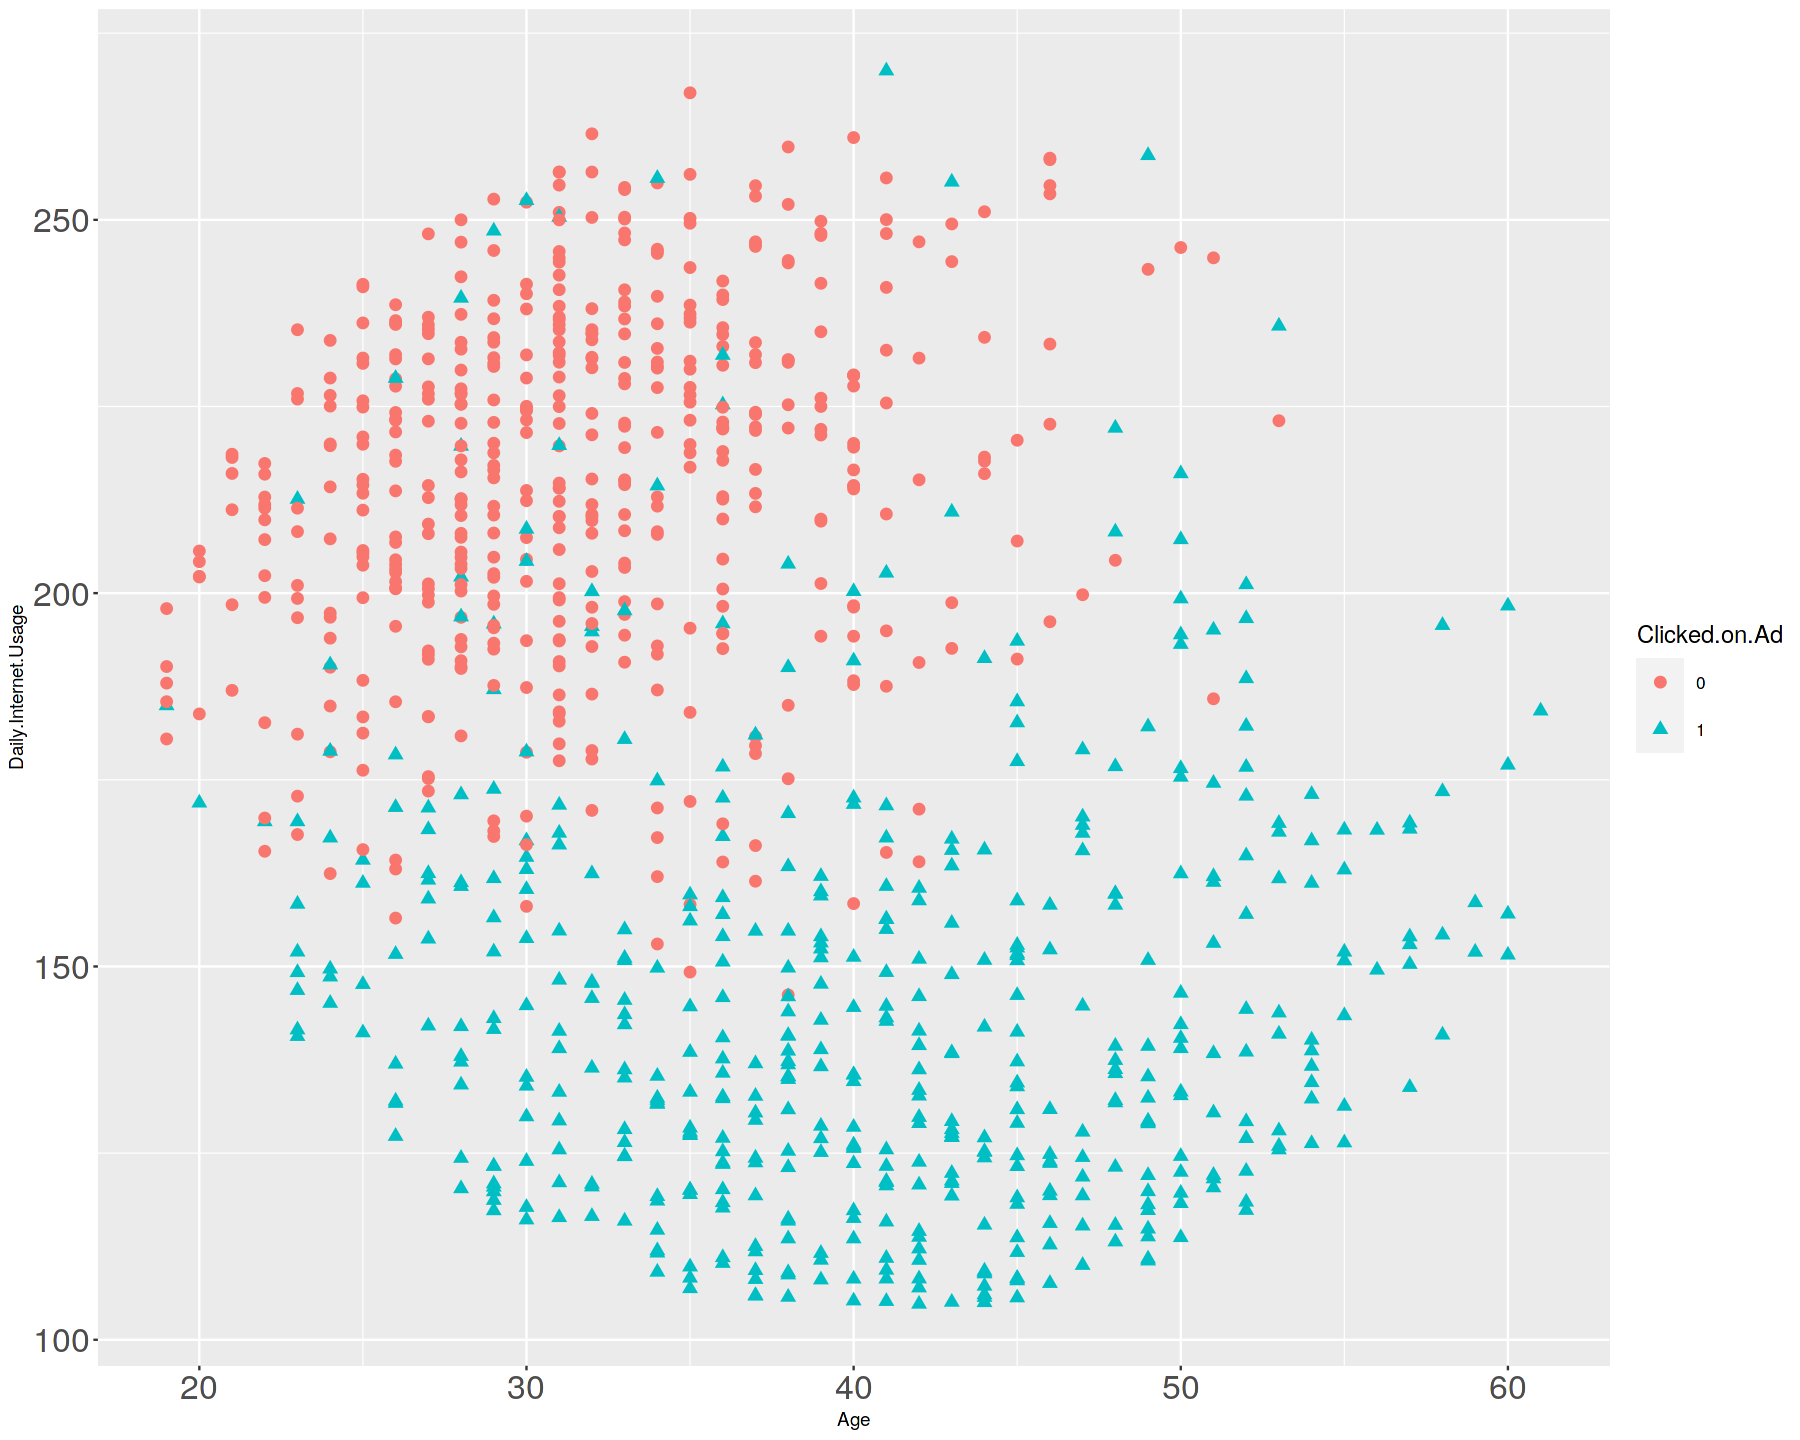

In [7]:
# SOLUTION BEGINS HERE
options(repr.plot.width=15, repr.plot.height=12)
ggplot(data, aes(x=Age, y=Daily.Internet.Usage, group=Clicked.on.Ad))+
geom_point(aes(shape=Clicked.on.Ad, color=Clicked.on.Ad), size=3)+
theme(legend.key.size = unit(1, 'cm'), #change legend key size
        legend.key.height = unit(1, 'cm'), #change legend key height
        legend.key.width = unit(1, 'cm'), #change legend key width
        legend.title = element_text(size=14), #change legend title font size
        legend.text = element_text(size=10),
        axis.text.x = element_text(size=20),
        axis.text.y = element_text(size=20)
     )  #change legend text font size



# SOLUTION ENDS HERE

## Assessment
Based on the scatter plot above if we introduce a new data point where an individual has a 'Daily.Internet.Usage' less than or equal to 150, and an age of 40. The individual is more likely to click on the AD

### Q4. (7 Points)

#### Create a logistic regression model using the variables 'Daily.Time.Spent.on.Site', 'Age', and 'Area.Income' to predict the variable 'Clicked.on.Ad'. Display the summary output of this logistic regression model. 

#### Now that we have created our logistic regression model, we must test the model. When testing such models, it is always recommended to split the data into a training (from which we build the model) and test (on which we test the model) set. This is done to avoid bias, as testing the model on the data from which it is originally built from is unrepresentative of how the model will perform on new data. 

#### That said, for the case of simplicity, test the model on the full original dataset. 

- Use type = ”response” to insure we get the predicted probabilities of clicking the advert 

- Append the predicted probabilities to a new column in the original dataset or simply to a new data frame. The choice is up to you, but ensure you know how to reference this column of probabilities. 

#### Using a threshold of 80% (0.8), create a new column in the original dataset that represents if the model predicts a click or not for that person. Note this means probabilities greater than or equal to 80% should be treated as a click prediction. Now, using the caret package, create a confusion matrix for the model predictions and actual clicks. Print and/or plot this output. 

In [8]:
# SOLUTION BEGINS HERE

model1 <- glm(Clicked.on.Ad ~ Daily.Time.Spent.on.Site+Age+Area.Income, data = data, family=binomial(link="logit"))
summary(model1)

threshold <- 0.8

## Add probabilities and predicted values to data set
data$predicted_prbl <- predict(model1, newdata=data[, c("Daily.Time.Spent.on.Site","Age","Area.Income")], type="response")
data <- data %>%
mutate(predicted_value= ifelse(predicted_prbl >= threshold, 1,0))
data$predicted_value <- as.factor(data$predicted_value)

## Pedict and create a confusion matrix
cm <- confusionMatrix(data$predicted_value, data$Clicked.on.Ad)
cm


# SOLUTION ENDS HERE


Call:
glm(formula = Clicked.on.Ad ~ Daily.Time.Spent.on.Site + Age + 
    Area.Income, family = binomial(link = "logit"), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.59567  -0.30198  -0.06632   0.09470   2.84467  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               1.504e+01  1.443e+00  10.420   <2e-16 ***
Daily.Time.Spent.on.Site -2.048e-01  1.565e-02 -13.085   <2e-16 ***
Age                       1.630e-01  1.785e-02   9.132   <2e-16 ***
Area.Income              -1.173e-04  1.274e-05  -9.206   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1386.29  on 999  degrees of freedom
Residual deviance:  391.98  on 996  degrees of freedom
AIC: 399.98

Number of Fisher Scoring iterations: 7


Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 488  87
         1  12 413
                                          
               Accuracy : 0.901           
                 95% CI : (0.8808, 0.9188)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.802           
                                          
 Mcnemar's Test P-Value : 1.028e-13       
                                          
            Sensitivity : 0.9760          
            Specificity : 0.8260          
         Pos Pred Value : 0.8487          
         Neg Pred Value : 0.9718          
             Prevalence : 0.5000          
         Detection Rate : 0.4880          
   Detection Prevalence : 0.5750          
      Balanced Accuracy : 0.9010          
                                          
       'Positive' Class : 0               
                              

### Q5. (7 Points)

#### Given the output above, how many false negative occurrences do you observe? Recall false negative means the instances where the model predicts the case to be false when in reality it is true. For this example, this refers to cases where the ad is clicked but the model predicts that it isn’t. Using the Proc() library, use the roc() function to create and plot a ROC curve of our predictions and true labels.   

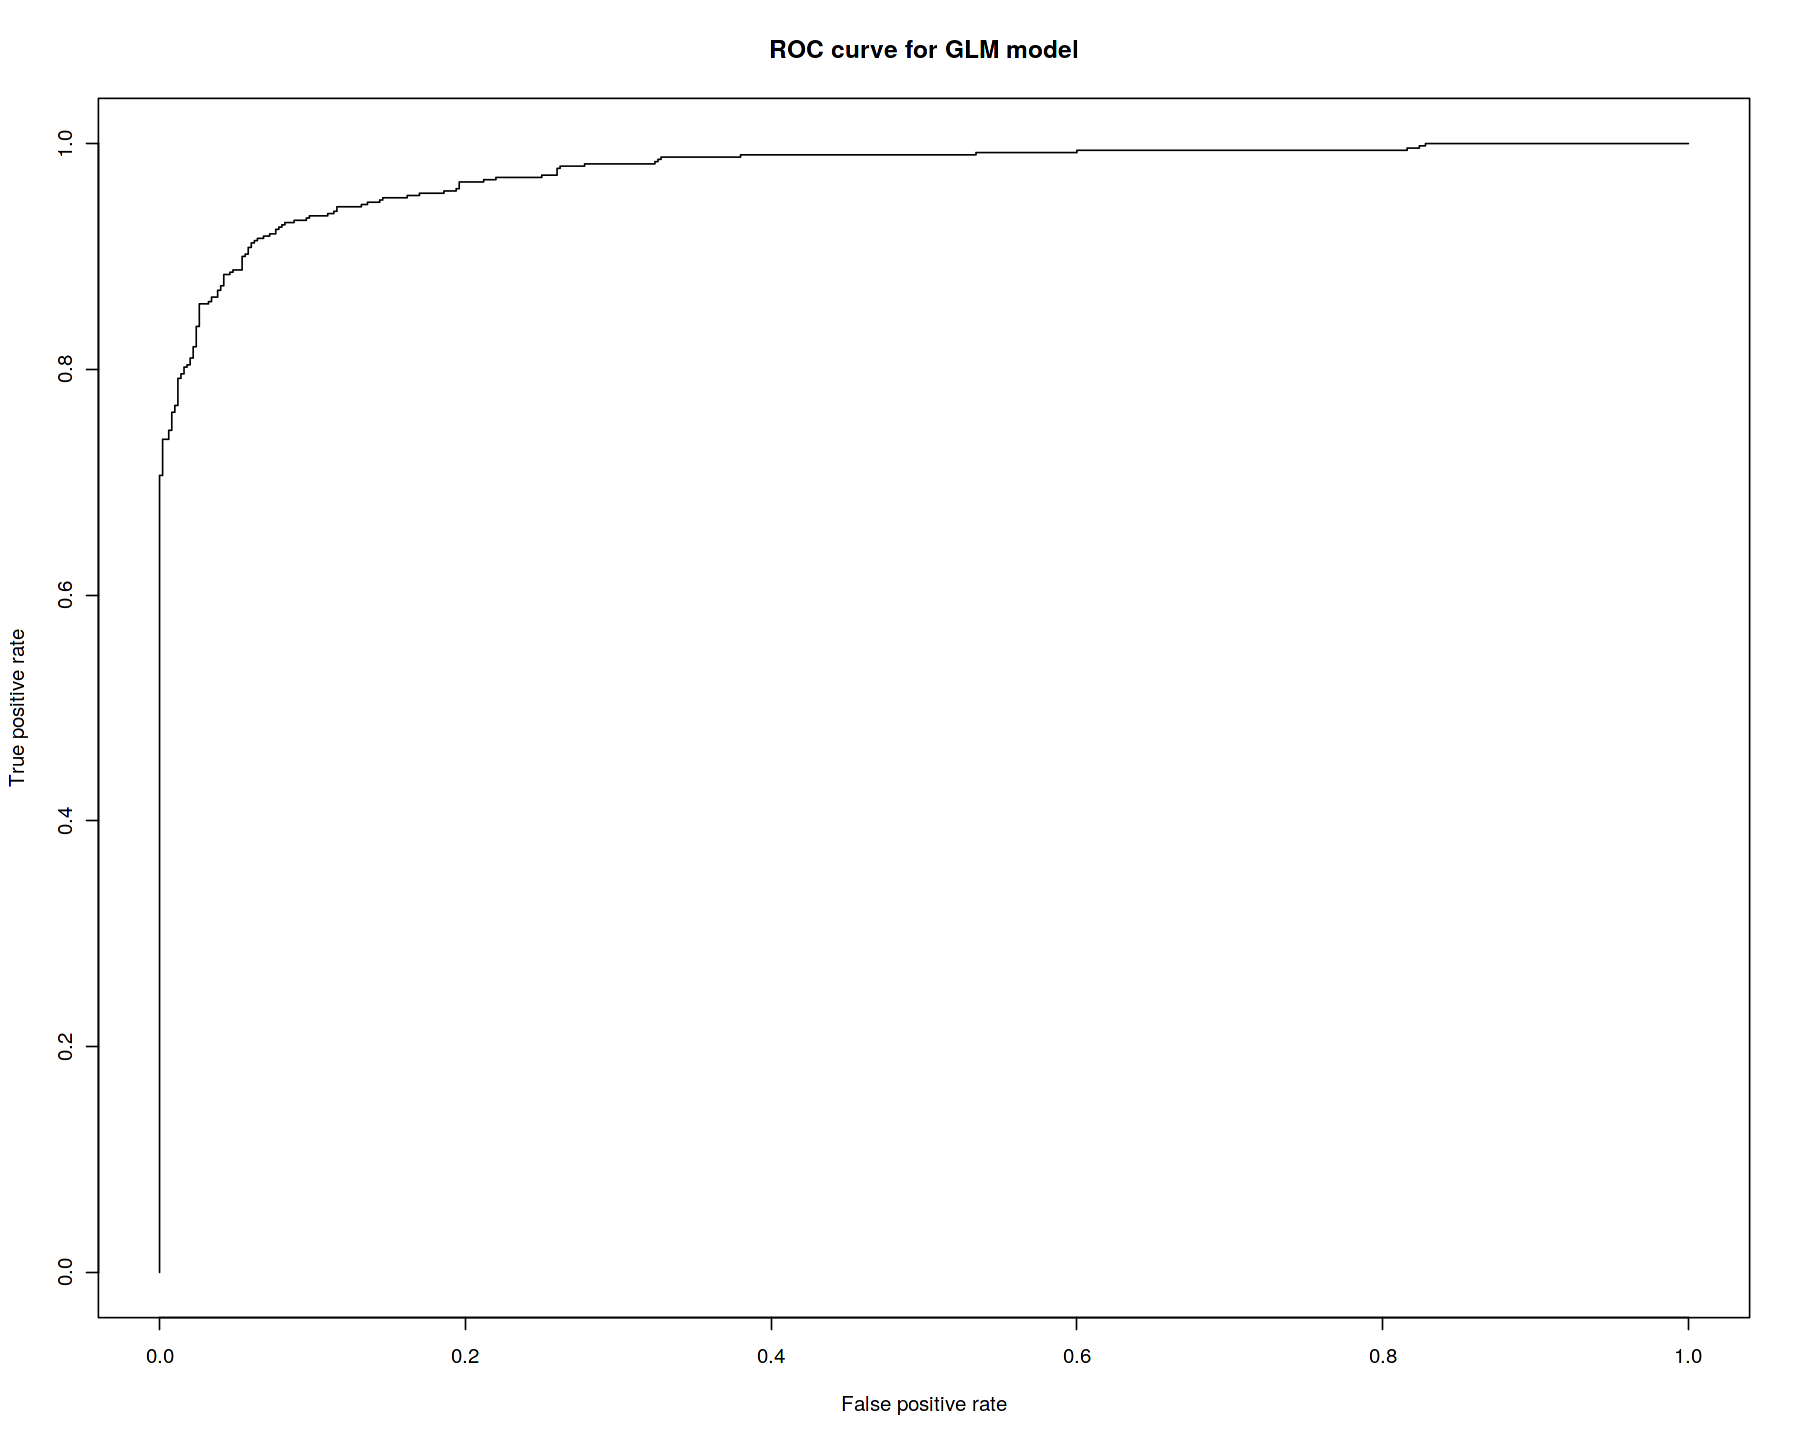

In [9]:
# SOLUTION BEGINS HERE
library(ROCR)
false_negative <- cm$table[1,2]

#predicts <- predict(model1, newdata=data[, c("Daily.Time.Spent.on.Site","Age","Area.Income")], type="response")
predicts <- prediction(as.numeric(data$predicted_prbl),as.numeric(data$Clicked.on.Ad))
roc <- performance(predicts,"tpr", "fpr")
plot(roc,main="ROC curve for GLM model")
# SOLUTION ENDS HERE

## Instructions for Questions Q6-Q8: 

In response to the ongoing pandemic, a local restaurant has implemented social distancing measures, which include the closing its in person dining areas. In order to keep the business going, the restaurant will now rely on drive through lines to handle customer ordering and service. After implementing the new ordering system, management observes that customers arrive at the rate of 62 customers per hour. Under the current system the restaurant has only 5 servers with a total service rate of 70 customers/hour.  

### Q6. (8 Points)

#### a. Given the description above, what is the average amount of time customers will wait in line under the current restaurant scenario? (round to nearest minute) (4 Points)

In [10]:
# SOLUTION BEGINS HERE
Arrivalrate = 62
Servicerate = 70

L = (Arrivalrate*Arrivalrate)/((Servicerate-Arrivalrate)*Servicerate)
W = L/Arrivalrate
WaitTimeMinutes = W*60
round(WaitTimeMinutes)
# SOLUTION ENDS HERE

[1] 7

#### b. Now consider that the restaurant manager from above is wanting to reduce customer waiting times. In order to do this, the manager decides to add another server bringing the total number of servers to 6 and the total service rate to 84 customer/hour. On average, how many customers will be waiting in the queue after the manager introduces this extra server? (round to closest integer) (average arrival remains 62/hour) (4 Points)

In [11]:
# SOLUTION BEGINS HERE
Arrivalrate = 62
Servicerate = 84

L = (Arrivalrate*Arrivalrate)/((Servicerate-Arrivalrate)*Servicerate)
round(L)

# SOLUTION ENDS HERE

[1] 2

### Q7. (7 Points)

#### Now consider that every server on duty for the restaurant adds a constant 14 customer/hour to the total service rate of the restaurant.  For example, with 7 servers on duty the restaurant has a service rate of 98 customers/hour (7 * 14 = 98).  Also the rate of arrival for the restaurant has changed to 82 customers/hour.  Plot (using R) the average amount of time customers will wait in line with various numbers of servers. The minimum servers that can be on duty is 7 and the maximum is 20. Display the plot as output.   

,Servers,WaitTimeMinutes,W
WaitTime,7,3.14,0.052295918
WaitTime,8,1.46,0.024404762
WaitTime,9,0.89,0.014790765
WaitTime,10,0.61,0.010098522
WaitTime,11,0.44,0.007395382
WaitTime,12,0.34,0.005675526
WaitTime,13,0.27,0.004505495
WaitTime,14,0.22,0.003669889
WaitTime,15,0.18,0.003050595
WaitTime,16,0.15,0.002577968


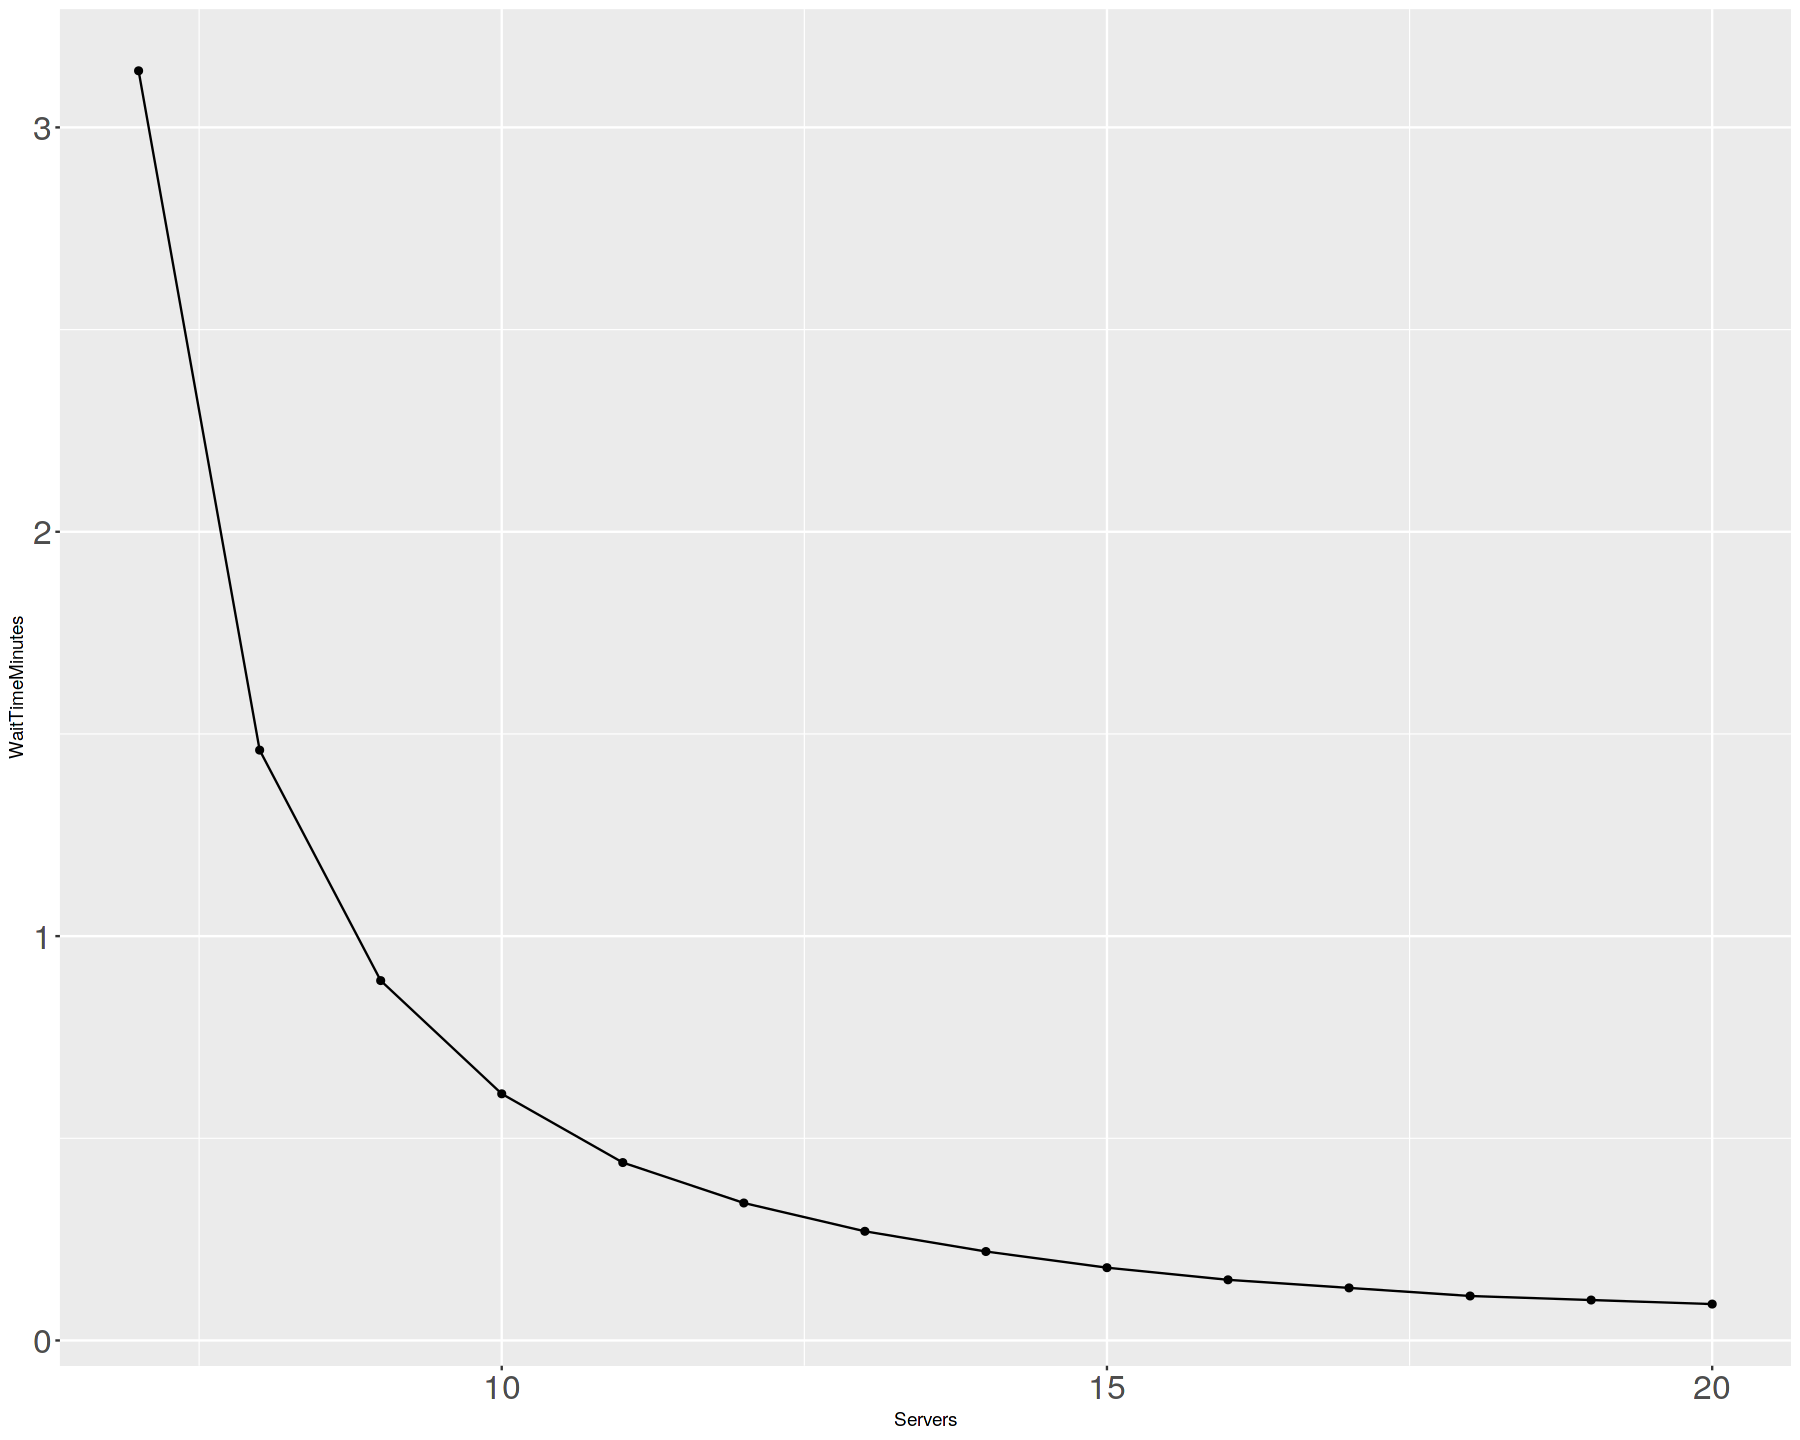

In [12]:
# SOLUTION BEGINS HERE
Arrivalrate = 82
column_names = c("Servers", "WaitTimeMinutes", "W")
result = matrix(ncol = 3, nrow = 0)
colnames(result) = column_names

for(var in 7:20)
{
    Servicerate = 14*var
    L = (Arrivalrate*Arrivalrate)/((Servicerate-Arrivalrate)*Servicerate)
    W = L/Arrivalrate
    WaitTimeMinutes = round(W*60,2)
    
    WaitTime <- c(as.numeric(var), as.numeric(WaitTimeMinutes), as.numeric(W))
    result <- rbind(result, WaitTime)
}

result

ggplot(data=as.data.frame(result), aes(x=Servers, y=WaitTimeMinutes)) +
  geom_line()+
  geom_point()+
theme(
        axis.text.x = element_text(size=20),
        axis.text.y = element_text(size=20)
     )  #change legend text font size


# SOLUTION ENDS HERE

### Q8. (8 Points)

#### a. Based on your plot above, at what number of servers does the average customer wait time drop below 3 minutes? (4 Points)

In [13]:
# SOLUTION BEGINS HERE
min(result[result[,"WaitTimeMinutes"]<3,][,"Servers"])

# SOLUTION ENDS HERE

[1] 8

#### b. Based on your plot above, Describe the behavior of the chart and give some commentary about the relationship between the two variables. For example, is the chart increase or decreasing? What value does average wait time approach if we continue to add more and more servers (to infinity)? (4 Points)

Based on the plot above we see that the average wait time decreases and approaches 0 as the number of servers increases.
We see that it form an elbow like curve and the drop in wait time diminishes beyond 10 servers.